# Entangled state

$$ |\psi\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$$

### Setup

Here we import the small number of tools we need for this tutorial.


In [2]:
# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [2]:
pip install qiskit 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 5.3 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.7/22.7 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 3.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# IBM Quantum channel; set to default 
 
token = "my_token"

QiskitRuntimeService.save_account(channel="ibm_quantum", token=token, overwrite=True, set_as_default=True)

In [4]:
service = QiskitRuntimeService()

In [5]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_yonsei')>]

In [6]:
backend_ys = service.backend("ibm_yonsei")

In [7]:
backend_ys

<IBMBackend('ibm_yonsei')>

In [60]:
backend_ys.num_qubits

127

In [9]:
backend_ys

<IBMBackend('ibm_yonsei')>

In [10]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_sherbrooke'

Quantum circuit

In [12]:
num_qubits = 2
num_classical_bits = 2

qc = QuantumCircuit(num_qubits, num_classical_bits)

qc.h(0)
qc.cx(0,1)

qc.measure([0,1], [0,1])


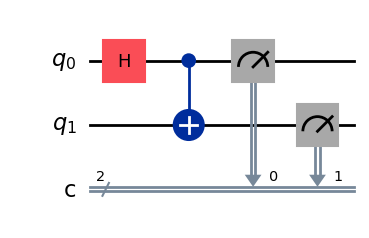

In [13]:
qc.draw('mpl')

## Step 2. Optimize problem for quantum execution


In [11]:
backend_ys

<IBMBackend('ibm_yonsei')>

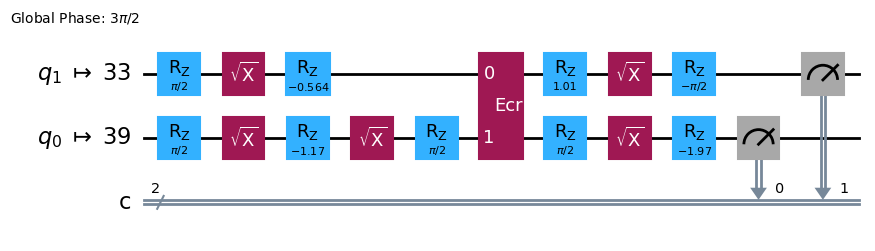

In [61]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend_ys.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

## Step 3. Execute using Qiskit Primitives

Setting Sampler

In [15]:
# To run on local simulator:
#   1. Use the SatetvectorSampler from qiskit.primitives instead
sampler = Sampler(mode=backend_ys)
sampler.options.default_shots = 10_000

Run

In [16]:
ibmq_job = sampler.run([circuit_isa])

Job ID

In [17]:
job_id_ys = ibmq_job.job_id()

job_id_ys

'd0gsrrv36cs0008rc0j0'

Job status

In [18]:
ibmq_job.status()

'QUEUED'

Call job

In [19]:
job = service.job(job_id_ys)

In [20]:
job.status()

'QUEUED'

Result

In [ ]:
czyxywk6rr3g008mhwn0

In [66]:
# job_history = service.job("czyzwgtkzhn0008dbdn0")
job_history = service.job("czyxywk6rr3g008mhwn0")

In [67]:
result = job_history.result()

In [68]:
result

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=10000, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-04-15 05:00:28', stop='2025-04-15 05:00:31', size=10000>)])}, 'version': 2})

In [69]:
result[0].data

DataBin(c=BitArray(<shape=(), num_shots=10000, num_bits=2>))

In [70]:
result[0].data.c

BitArray(<shape=(), num_shots=10000, num_bits=2>)

In [71]:
result[0].data.c.get_counts()

{'10': 64, '11': 4881, '00': 4981, '01': 74}

In [72]:
dist = result[0].data.c.get_counts()

In [73]:
result

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=10000, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-04-15 05:00:28', stop='2025-04-15 05:00:31', size=10000>)])}, 'version': 2})

## Step 4. Post-process, return result in classical format


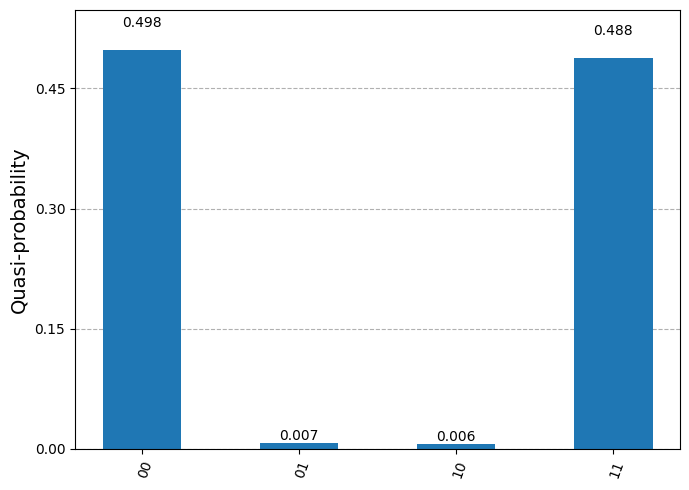

In [74]:
plot_distribution(dist)

## Local simulator

In [51]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_state_city


In [11]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.9 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [52]:
simulator = AerSimulator()

In [53]:
circ = transpile(qc, simulator)


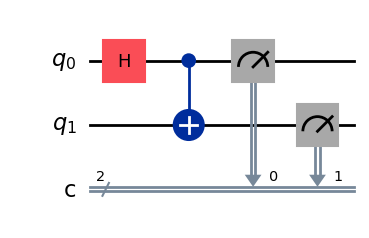

In [54]:
circ.draw('mpl')

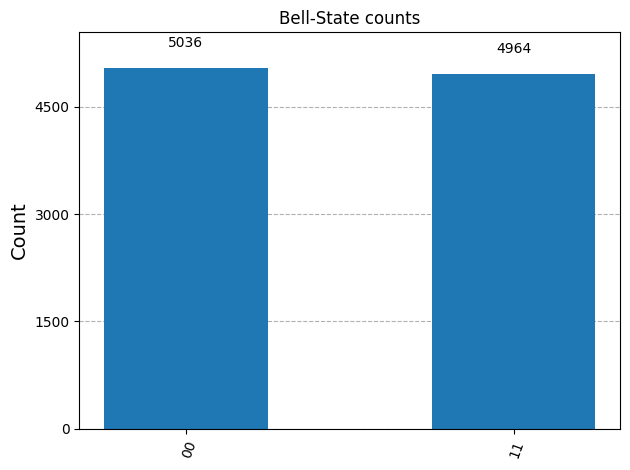

In [55]:
# Run and get counts
result_sim = simulator.run(circ, shots=10000).result()
counts = result_sim.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [56]:
counts

{'11': 4964, '00': 5036}

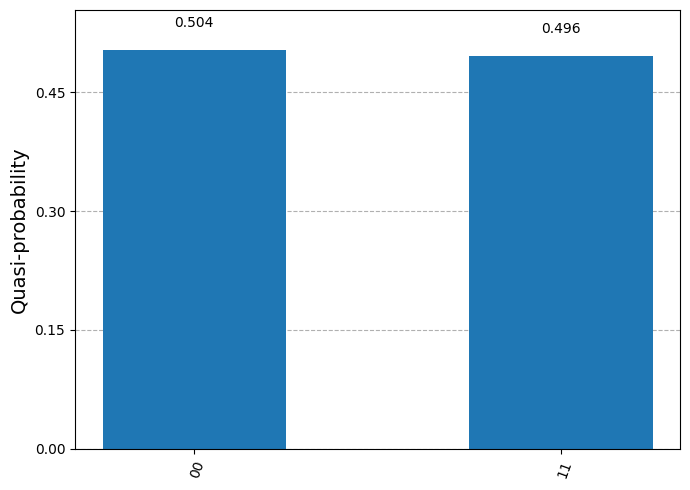

In [57]:
plot_distribution(counts)

In [58]:
import qiskit_ibm_runtime

qiskit_ibm_runtime.version.get_version_info()

'0.37.0'

In [59]:
import qiskit

qiskit.version.get_version_info()

'2.0.0'

## Tutorial Survey

<table style="width: 100%;">
<tbody>
<tr>
<td style="width: 10%;"><img src="https://learning-api.quantum.ibm.com/assets/53171443-b07b-4ae6-a4be-9aec32a854f5" alt="Survey" width="100%" height="100%"></td>
<td style="width: 80%;"><strong><a title="Tutorial Survey" href="https://your.feedback.ibm.com/jfe/form/SV_9oxLZ9HicmqM54a" target="_blank">Tutorial Survey</a></strong><br>Please take one minute to provide feedback on this tutorial. Your insights will help us improve our content offerings and user experience.</td>
</tr>
</tbody>
</table>
